In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# importing ploting libraries
import matplotlib.pyplot as plt 

In [5]:
from scipy.stats import zscore

In [6]:
# reading the CSV file into pandas dataframe
wine_data = pd.read_csv("d:\ml-Data\winequality-red.csv") 

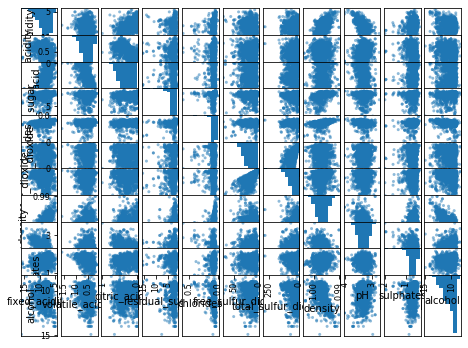

In [7]:
wine_data_attr = wine_data.iloc[:,0:11]

axes = pd.plotting.scatter_matrix(wine_data_attr)
plt.tight_layout()

In [8]:
from sklearn.cluster import AgglomerativeClustering 

In [376]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='complete')

In [377]:
model.fit(wine_data_attr)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x000002BEA7762E18>)

In [378]:
wine_data_attr['labels'] = model.labels_
type(wine_data_attr)

pandas.core.frame.DataFrame

In [379]:
## print("Accuracy :", metrics.accuracy_score(wine_data_attr.actual_label, wine_data_attr.predicted_label))   ... 
# Since we do not have any actual lables to compare with, this line is not useful to us hence commented out

In [380]:
#labels = model.fit_predict(wine_data_attr) 

In [381]:
#print('Cluster labels: %s' % labels) 

In [382]:
#labels.shape

In [383]:
#wine_data_attr['labels'] = labels

In [384]:
wine_clusters = wine_data_attr.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])

In [385]:
print(wine_clusters)

In [386]:
wine_groups=wine_clusters.head(1599)#This creates a pandas dataframegroupby object


In [387]:
from pandas import ExcelWriter
writer = ExcelWriter('d:\wine_groups.xls')
wine_groups.to_excel(writer,'Sheet1')
writer.save()



In [388]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [389]:
from scipy.spatial.distance import pdist

In [390]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_attr, 'ward')
c, coph_dists = cophenet(Z , pdist(wine_data_attr))

c

0.76697598055644767

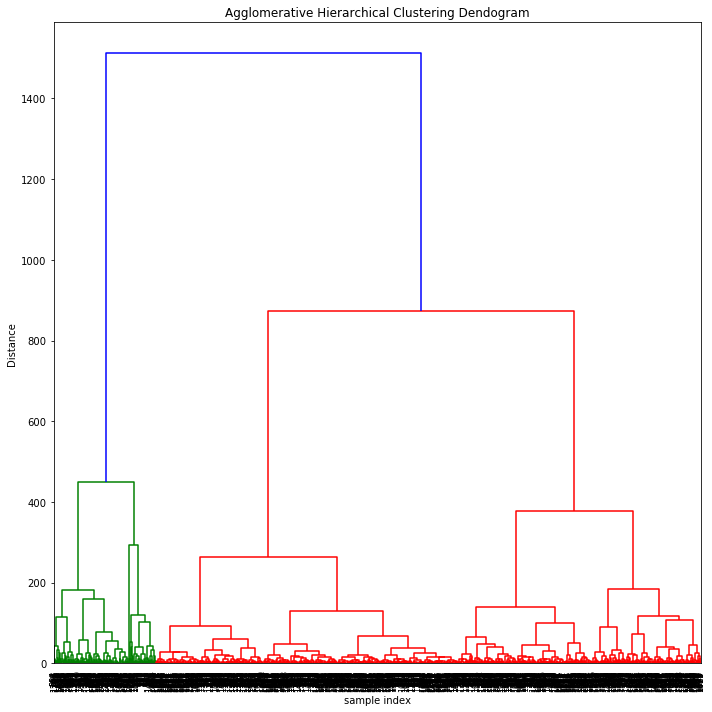

In [391]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8. )
plt.tight_layout()